<a href="https://colab.research.google.com/github/TNaingHtwe/GraSPP-25S-climatechange/blob/main/20250525_Disaster_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EM-DAT Data**

Data source https://public.emdat.be/


In [1]:
#Created a fork and cloned data from repo to use
import pandas as pd
!git clone https://github.com/TNaingHtwe/GraSPP-25S-climatechange.git
# Load the data from the cloned repo
df = pd.read_excel('GraSPP-25S-climatechange/data/raw/public_emdat_custom_request_2025-05-06_fbc8ee61-93e5-46cb-b9a2-492c362b1411.xlsx')

df["Entry Date"] = pd.to_datetime(df["Entry Date"], errors='coerce')
df["Year"] = df["Entry Date"].dt.year

# Preview
df.head()

Cloning into 'GraSPP-25S-climatechange'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 133 (delta 15), reused 12 (delta 12), pack-reused 111 (from 2)
Receiving objects: 100% (133/133), 5.46 MiB | 12.33 MiB/s, done.
Resolving deltas: 100% (32/32), done.


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year
0,2005-0002-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-01-06,2023-09-25,2005
1,2005-0003-BRA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,BRA,...,NaN,NaN,NaN,NaN,NaN,64.09274,"[{""adm2_code"":10760,""adm2_name"":""Criciuma""}]",2005-01-06,2023-09-25,2005
2,2005-0005-IRN,No,tec-mis-exp-exp,Technological,Miscellaneous accident,Explosion (Miscellaneous),Explosion (Miscellaneous),NaN,Appartment,IRN,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-01-06,2023-09-25,2005
3,2005-0007-CHN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,CHN,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-01-06,2023-09-25,2005
4,2005-0008-ITA,No,tec-tra-rai-rai,Technological,Transport,Rail,Rail,NaN,NaN,ITA,...,NaN,NaN,NaN,NaN,NaN,64.09274,NaN,2005-03-28,2023-09-25,2005


Add a new column Region to group the countries.

In [64]:
# Tag EU and other important countries
eu_countries = [ "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia",
                 "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia",
                 "Lithuania", "Luxembourg", "Malta", "Netherlands (Kingdom of the)", "Poland", "Portugal",
                 "Romania", "Slovakia", "Slovenia", "Spain", "Sweden" ]
other_countries = [
    "China", "United States", "India", "Russian Federation", "Indonesia",
    "Brazil", "Japan", "Iran", "Canada",'Iran (Islamic Republic of)','United States of America'
]

# Assign 'Region' for logic
def assign_region(country):
    if country in eu_countries:
        return "Europe"
    elif country in ["United States", "United States of America", "Canada", "Brazil"]:
        return "Americas"
    elif country in ["China", "India", "Japan", "Indonesia", "Iran", "Iran (Islamic Republic of)"]:
        return "Asia"
    else:
        return "Other"

df["Region"] = df["Country"].apply(assign_region)


Checking unnesscesary columns and filtering for natural disaster related!!!

In [65]:
print(df.columns.tolist())
df.info()

#Checking data related to disaster
print("Disaster Group:")
print(df["Disaster Group"].unique())

print("\nDisaster Subgroup:")
print(df["Disaster Subgroup"].unique())

print("\nDisaster Type:")
print(df["Disaster Type"].unique())

print("\nDisaster Subtype:")
print(df["Disaster Subtype"].unique())


['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update', 'Year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4219 entries, 0 to 4218
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype         
-

Filtering for Natural Disaster Related

In [40]:
#Filtering out the natural disaster
climate_subgroups = ["Meteorological", "Hydrological", "Climatological"]
df_climate = df[
    (df["Disaster Group"] == "Natural") &
    (df["Disaster Subgroup"].isin(["Meteorological", "Hydrological", "Climatological"]))
].copy()

df_climate["Total Damage (Million USD)"] = (
    df_climate["Total Damage, Adjusted ('000 US$)"] / 1000
)

df_climate.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year,Total Damage (Million USD)
1,2005-0003-BRA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,BRA,...,NaN,NaN,NaN,NaN,64.09274,"[{""adm2_code"":10760,""adm2_name"":""Criciuma""}]",2005-01-06,2023-09-25,2005,NaN
6,2005-0011-DEU,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Erwin,DEU,...,200000.0,312048.0,270000.0,421265.0,64.09274,"[{""adm1_code"":1322,""adm1_name"":""Schleswig-Hols...",2007-02-21,2023-09-25,2007,421.265
7,2005-0011-DNK,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Erwin,DNK,...,900000.0,1404215.0,1300000.0,2028311.0,64.09274,"[{""adm1_code"":1077,""adm1_name"":""Aarhus""},{""adm...",2005-01-12,2023-09-25,2005,2028.311
8,2005-0011-EST,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Erwin,EST,...,26000.0,40566.0,130000.0,202831.0,64.09274,"[{""adm2_code"":16018,""adm2_name"":""Pärnu linn""}]",2005-01-12,2023-09-25,2005,202.831
9,2005-0011-IRL,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Erwin,IRL,...,NaN,NaN,NaN,NaN,64.09274,"[{""adm1_code"":1587,""adm1_name"":""Dublin""},{""adm...",2005-01-10,2023-09-25,2005,NaN


Disaster related to climate happened across the world

In [41]:
# Aggregate metrics using adjusted damage
summary = df_climate.groupby("Country").agg({
    "Total Deaths": "sum",
    "Total Affected": "sum",
    "Total Damage, Adjusted ('000 US$)": "sum"
}).reset_index()

# Add disaster count
summary["Disaster Count"] = df_climate.groupby("Country").size().values

# Convert to million USD
summary["Total Damage (Million USD)"] = summary["Total Damage, Adjusted ('000 US$)"] / 1000

summary["hover_text"] = (
    "Country: " + summary["Country"] +
    "<br>Disasters: " + summary["Disaster Count"].astype(str) +
    "<br>Total Deaths: " + summary["Total Deaths"].fillna(0).round().astype(int).astype(str) +
    "<br>Total Damage (Million USD): " + summary["Total Damage (Million USD)"].fillna(0).round(0).astype(int).astype(str)
)

summary["customdata"] = summary["hover_text"]



#Plotly Choropleth with Custom Hover
import plotly.express as px

fig = px.choropleth(
    summary,
    locations="Country",
    locationmode="country names",
    color="Disaster Count",
    color_continuous_scale="Reds"
)

fig.update_traces(customdata=summary["customdata"], hovertemplate="%{customdata}<extra></extra>")
fig.update_layout(title="Climate-Related Disasters: Frequency, Deaths, and Damage")
fig.show()

Disaster count, death and damage by countries

<ipython-input-45-00664d7c0db2>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




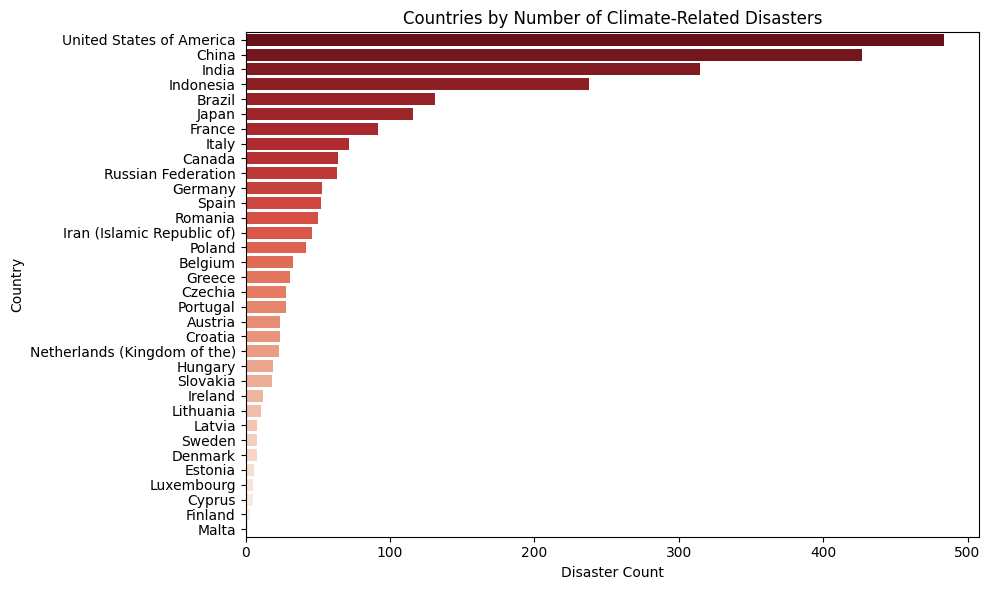

<ipython-input-45-00664d7c0db2>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




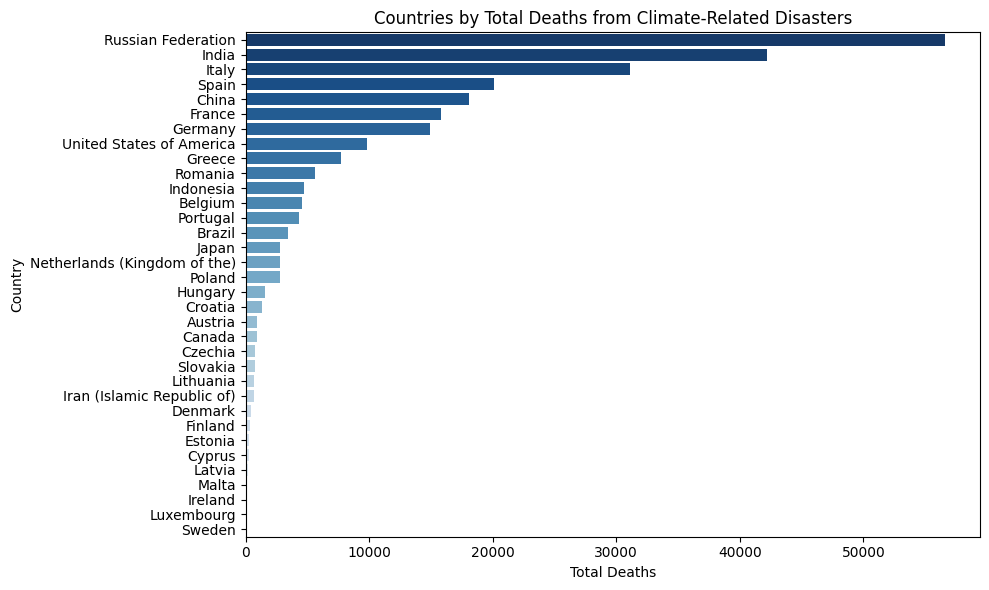

<ipython-input-45-00664d7c0db2>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




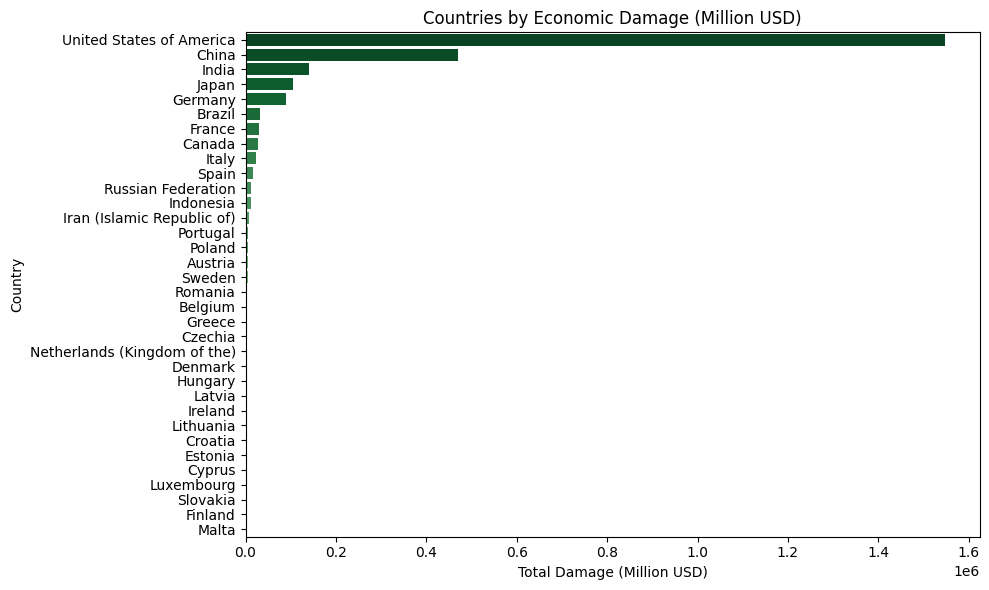

In [45]:
# Count Data
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by count and take top 15
top_disasters = summary.sort_values("Disaster Count", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_disasters, x="Disaster Count", y="Country", palette="Reds_r")
plt.title("Countries by Number of Climate-Related Disasters")
plt.xlabel("Disaster Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Death Data
top_deaths = summary.sort_values("Total Deaths", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_deaths, x="Total Deaths", y="Country", palette="Blues_r")
plt.title("Countries by Total Deaths from Climate-Related Disasters")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# Damage Data
top_damage = summary.sort_values("Total Damage (Million USD)", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top_damage, x="Total Damage (Million USD)", y="Country", palette="Greens_r")
plt.title("Countries by Economic Damage (Million USD)")
plt.xlabel("Total Damage (Million USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


Summary Statistics

In [58]:
print(f"Number of countries: {df_climate['Country'].nunique()}")
print(f"Time period: {df_climate['Year'].min()} to {df_climate['Year'].max()}")
print(f"Total number of disaster events: {len(df_climate)}")

df_climate[[
    "Total Deaths",
    "Total Affected",
    "Total Damage, Adjusted ('000 US$)"
]].describe().round(2).T

df_climate["Total Damage (Million USD)"] = df_climate["Total Damage, Adjusted ('000 US$)"] / 1000

df_climate[[
    "Total Deaths",
    "Total Affected",
    "Total Damage (Million USD)"
]].describe().round(2).T


Number of countries: 34
Time period: 2005 to 2025
Total number of disaster events: 2541


,count,mean,std,min,25%,50%,75%,max
Total Deaths,1996.0,128.78,1425.70,1.0,4.00,12.0,32.25,5.573600e+04
Total Affected,1725.0,1119448.01,10060740.66,1.0,394.00,4000.0,50650.00,3.300000e+08
Total Damage (Million USD),1127.0,2266.97,9066.28,0.7,125.38,438.8,1596.28,1.950299e+05


Create Kyoto and Paris Subsets

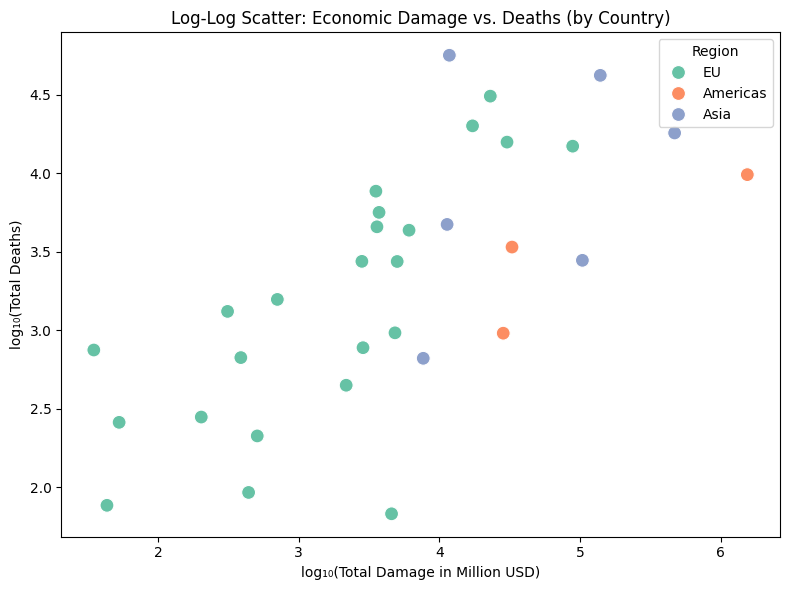

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reuse your region classifier
def assign_region(country):
    if country in eu_countries:
        return "EU"
    elif country in other_countries:
        return "Americas" if country in ["United States of America", "Canada", "Brazil"] else "Asia"
    else:
        return "Other"

summary["Region"] = summary["Country"].apply(assign_region)

scatter_df = summary[
    (summary["Total Damage (Million USD)"] > 0) &
    (summary["Total Deaths"] > 0)
].copy()

scatter_df["log_damage"] = np.log10(scatter_df["Total Damage (Million USD)"])
scatter_df["log_deaths"] = np.log10(scatter_df["Total Deaths"])

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=scatter_df,
    x="log_damage",
    y="log_deaths",
    hue="Region",
    palette="Set2",
    s=100
)
plt.title("Log-Log Scatter: Economic Damage vs. Deaths (by Country)")
plt.xlabel("log₁₀(Total Damage in Million USD)")
plt.ylabel("log₁₀(Total Deaths)")
plt.tight_layout()
plt.show()



Time series of Total Damage by Region

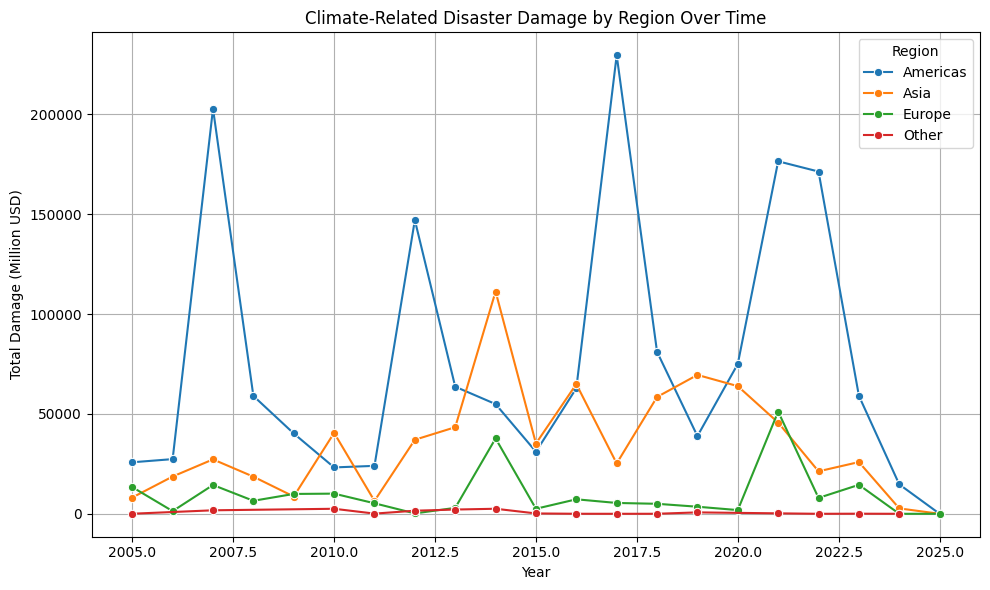

In [69]:
region_ts = df_climate.groupby(["Year", "Region"])["Total Damage (Million USD)"].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=region_ts, x="Year", y="Total Damage (Million USD)", hue="Region", marker="o")

plt.title("Climate-Related Disaster Damage by Region Over Time")
plt.xlabel("Year")
plt.ylabel("Total Damage (Million USD)")
plt.grid(True)
plt.tight_layout()
plt.show()



Time series of Total Damage by Top 5 Countries

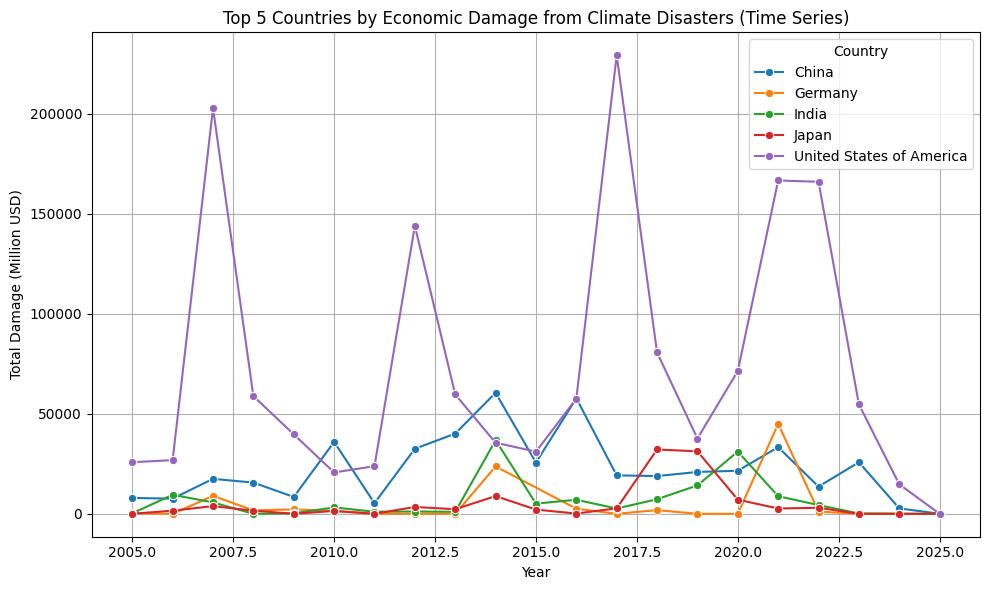

In [73]:
# Total damage by country (across all years)
top_damage_countries = df_climate.groupby("Country")["Total Damage (Million USD)"].sum()\
    .sort_values(ascending=False).head(5).index.tolist()
# Group yearly damage for selected countries
damage_top_countries = df_climate[df_climate["Country"].isin(top_damage_countries)]\
    .groupby(["Year", "Country"])["Total Damage (Million USD)"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=damage_top_countries, x="Year", y="Total Damage (Million USD)", hue="Country", marker="o")
plt.title("Top 5 Countries by Economic Damage from Climate Disasters (Time Series)")
plt.xlabel("Year")
plt.ylabel("Total Damage (Million USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


Case Studies

In [76]:
# Top Damage Countries
df_climate.sort_values("Total Damage (Million USD)", ascending=False).head(5)[
    ["Country", "Year", "Disaster Type", "Disaster Subtype", "Total Damage (Million USD)", "Total Deaths"]
]

,Country,Year,Disaster Type,Disaster Subtype,Total Damage (Million USD),Total Deaths
185,United States of America,2007,Storm,Tropical cyclone,195029.889,1833.0
2776,United States of America,2017,Storm,Tropical cyclone,118091.963,88.0
3750,United States of America,2022,Storm,Tropical cyclone,104116.407,152.0
3530,United States of America,2021,Storm,Tropical cyclone,73091.612,96.0
2782,United States of America,2017,Storm,Tropical cyclone,70855.178,97.0


The United States overwhelmingly dominates the top five most expensive climate disasters, all involving tropical cyclones (hurricanes).

1. 2007 stands out with nearly $200 billion in damages and 1,833 deaths, likely representing Hurricane Katrina’s aftermath or similar mega-events.

1. 2017 appears twice, representing multiple hurricanes-probably Harvey, Irma, and Maria causing over $188 billion combined.

1. Despite the large economic impact, the death tolls (besides 2007) remain
comparatively moderate, indicating strong infrastructure and disaster preparedness.



In [77]:
# Top Death Countries
df_climate.sort_values("Total Deaths", ascending=False).head(5)[
    ["Country", "Year", "Disaster Type", "Disaster Subtype", "Total Damage (Million USD)", "Total Deaths"]
]

,Country,Year,Disaster Type,Disaster Subtype,Total Damage (Million USD),Total Deaths
1360,Russian Federation,2010,Extreme temperature,Heat wave,558.943,55736.0
3717,Italy,2023,Extreme temperature,Heat wave,NaN,18010.0
3904,Italy,2023,Extreme temperature,Heat wave,NaN,12743.0
3709,Spain,2022,Extreme temperature,Heat wave,NaN,11324.0
3896,Spain,2023,Extreme temperature,Heat wave,NaN,8352.0


1. The deadliest climate disaster in the dataset occurred in Russia (2010) with a heatwave killing over 55,000 people — the single largest loss of life from a climate-related event.

2. In 2023, a cluster of extreme heat events in Italy and Spain caused massive
fatalities (8k–18k), although economic damages were not recorded (NaN). This suggests that heatwaves, while less visible in economic metrics, are profoundly lethal, especially in aging or vulnerable populations.

These findings highlight how economic damage and human death tolls don’t always align: the US suffers more financial loss, but countries like Russia and southern Europe suffer more in human terms.